<a href="https://colab.research.google.com/github/Forrward/LABbl/blob/main/lab5/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#–õ–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è

##–í—ã–±–æ—Ä –∏ –∏—Å–∫–ª—é—á–µ–Ω–∏–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö

–ó–∞–≥—Ä—É–∑–∏—Ç–µ –Ω–∞–±–æ—Ä –¥–∞–Ω–Ω—ã—Ö –∏–∑ —Ñ–∞–π–ª–∞ ```Regressions datasets``` –≤ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–∏ —Å –≤–∞—à–∏–º –≤–∞—Ä–∏–∞–Ω—Ç–æ–º (–æ —Å–º–µ–Ω–µ –¥–∞—Ç–∞—Å–µ—Ç–∞ - –∏–Ω–¥–∏–≤–∏–¥—É–∞–ª—å–Ω–æ)

In [117]:
!pip install datasets seaborn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats
from datasets import load_dataset
from sklearn.preprocessing import StandardScaler

df = pd.read_excel("Real estate valuation data set.xlsx")#—á—Ç–µ–Ω–∏–µ —Ñ–∞–π–ª–∞
df


X1 transaction date  X2 house age  \
0            2012.916667          32.0   
1            2012.916667          19.5   
2            2013.583333          13.3   
3            2013.500000          13.3   
4            2012.833333           5.0   
..                   ...           ...   
409          2013.000000          13.7   
410          2012.666667           5.6   
411          2013.250000          18.8   
412          2013.000000           8.1   
413          2013.500000           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4                                 390.56840                                5   
..                                      ...                              ...   
409                              4082.01500                                0   
410                                90.45606                                9   
411                               390.96960                                7   
412                               104.81010                                5   
413                                90.45606                                9   

     X5 latitude  X6 longitude  Y house price of unit area  
0       24.98298     121.54024                        37.9  
1       24.98034     121.53951                        42.2  
2       24.98746     121.54391                        47.3  
3       24.98746     121.54391                        54.8  
4       24.97937     121.54245                        43.1  
..           ...           ...                         ...  
409     24.94155     121.50381                        15.4  
410     24.97433     121.54310                        50.0  
411     24.97923     121.53986                        40.6  
412     24.96674     121.54067                        52.5  
413     24.97433     121.54310                        63.9  

[414 rows x 7 columns]

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


### –ü—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∞–Ω–∞–ª–∏–∑

1. –í—ã–±—Ä–∞—Ç—å —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é Y (Y - —á–∏—Å–ª–æ–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è –¥–ª—è –∑–∞–¥–∞—á–∏ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏)
2. –° –ø–æ–º–æ—â—å—é EDA (—Å–º –ø—Ä–∞–∫—Ç–∏–∫–∞) –æ—Ç–æ–±—Ä–∞—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–∏, –∫–æ—Ç–æ—Ä—ã–µ –≤–ª–∏—è—é—Ç –Ω–∞ Y (–º–æ–∂–Ω–æ –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å –≥–∞—Ä—Ñ–∏—á–µ—Å–∫–∏, –º–æ–∂–Ω–æ —á–∏—Å–ª–∞–º–∏).
3. –û–±—Ä–∞–±–æ—Ç–∞—Ç—å –ø—Ä–æ–ø—É—Å–∫–∏, –ø—Ä–∏ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç–∏ –ø–æ—á–∏—Å—Ç–∏—Ç—å –æ—Ç –≤—ã–±—Ä–æ—Å–æ–≤ (—Ç—É—Ç –≤–∞–∂–Ω–æ–µ –∑–∞–º–µ—á–∞–Ω–∏–µ - –Ω–µ –≤—Å–µ –≤—ã–±—Ä–æ—Å—ã —ç—Ç–æ –ø–ª–æ—Ö–æ)
4. –û–±–æ—Å–Ω–æ–≤–∞—Ç—å –≤—ã–±–æ—Ä –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö –¥–ª—è –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è (–∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è, —Ä–∞–∑–ª–∏—á–∏—è –ø–æ –∫–ª–∞—Å—Å–∞–º, –∏ —Ç–∞–∫ –¥–∞–ª–µ–µ)

P.S. –í–∞–∂–Ω–æ–µ –∑–∞–º–µ—á–∞–Ω–∏–µ, —Å–ª–∏—à–∫–æ–º —É–Ω–∏–∫–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ (–∏–º–µ–Ω–∞ –ª—é–¥–µ–π, –Ω–∞–∑–≤–∞–Ω–∏—è –≥–æ—Ä–æ–¥, ID —é–∑–µ—Ä–∞ –∏–ª–∏ —á–µ–≥–æ-—Ç–æ –µ—â–µ - –Ω–µ –±–µ—Ä–µ–º, —Ç–∞–∫ –∫–∞–∫ –æ–Ω–∏ –Ω–µ –≤–ª–∏—è—é—Ç –Ω–∞ —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é, –∞ –µ—Å–ª–∏ –∏ –≤–ª–∏—è–µ—Ç, —Ç–æ —ç—Ç–æ —Å–ª—É—á–∞–π–Ω–æ)

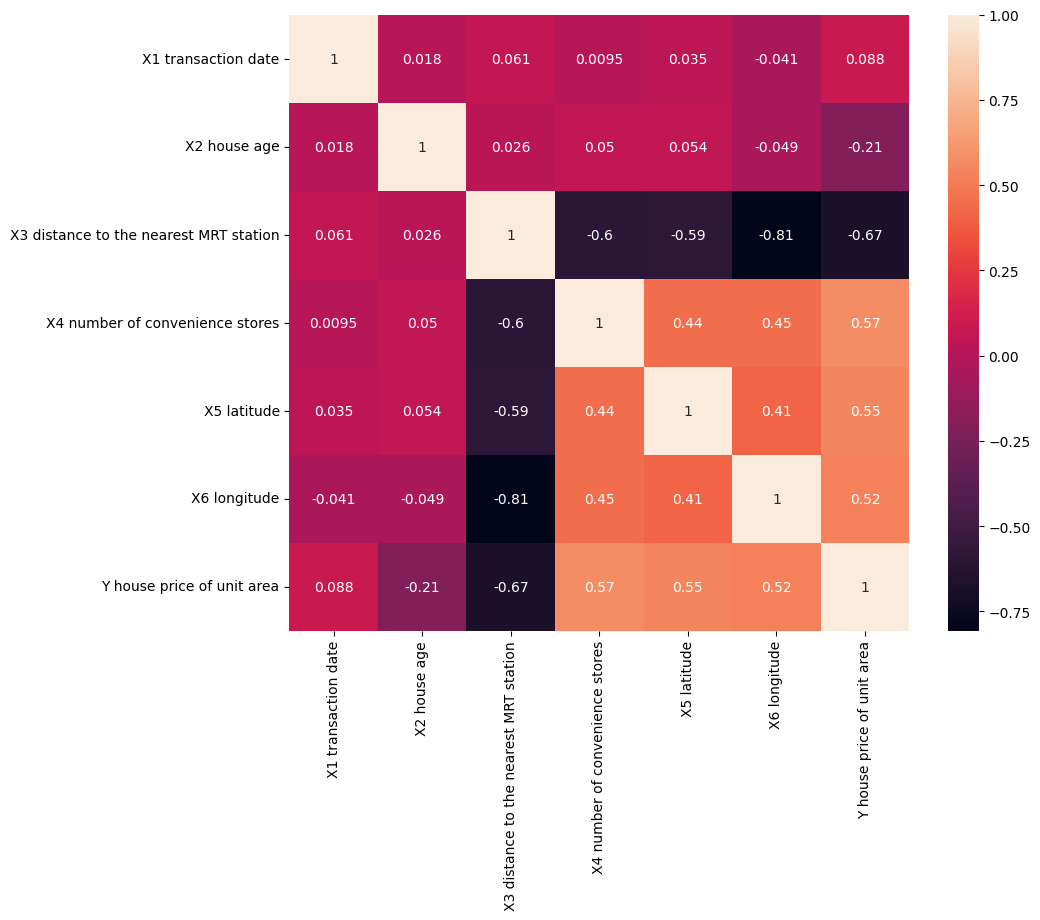

In [119]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [120]:
X = df
y = df['Y house price of unit area']# —Ü–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è
X = X.drop('Y house price of unit area', axis=1)# –ø—Ä–∏–∑–Ω–∞–∫–∏ –¥–ª—è –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train, y_test# 331 —Å—Ç—Ä–æ–∫–∞ –Ω–∞ –æ—É–±—á–µ–Ω–∏–µ –∏ 83 —Å—Ç—Ä–æ–∫–∏ –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏—é

(192     42.7
 234     23.9
 5       32.1
 45      38.3
 245     40.8
        ...  
 71      40.8
 106     47.1
 270    117.5
 348     53.7
 102     54.4
 Name: Y house price of unit area, Length: 331, dtype: float64,
 358    45.1
 350    42.3
 373    52.2
 399    37.3
 369    22.8
        ... 
 31     25.0
 283    23.5
 157    35.6
 203    46.1
 208    26.2
 Name: Y house price of unit area, Length: 83, dtype: float64)

### –¢—Ä–∞–Ω—Å—Ñ–æ—Ä–º–∞—Ü–∏—è –Ω–∞–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö

(OneHotEncode –¥–ª—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö)

(Standard or MinMax or –±–∏–Ω–∏–Ω–≥ –∏–ª–∏ –¥—Ä—É–≥–æ–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –¥–ª—è —á–∏—Å–ª–æ–≤—ã—Ö)

P.S. –¶–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é –Ω–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤—ã–≤–∞–µ–º, –æ—Å—Ç–∞–≤–ª—è–µ–º –∫–∞–∫ –µ—Å—Ç—å


In [121]:
df['X4 number of convenience stores'] = df['X4 number of convenience stores'].astype('category')
df = df.drop('X1 transaction date', axis=1)
df

X2 house age  X3 distance to the nearest MRT station  \
0            32.0                                84.87882   
1            19.5                               306.59470   
2            13.3                               561.98450   
3            13.3                               561.98450   
4             5.0                               390.56840   
..            ...                                     ...   
409          13.7                              4082.01500   
410           5.6                                90.45606   
411          18.8                               390.96960   
412           8.1                               104.81010   
413           6.5                                90.45606   

    X4 number of convenience stores  X5 latitude  X6 longitude  \
0                                10     24.98298     121.54024   
1                                 9     24.98034     121.53951   
2                                 5     24.98746     121.54391   
3                                 5     24.98746     121.54391   
4                                 5     24.97937     121.54245   
..                              ...          ...           ...   
409                               0     24.94155     121.50381   
410                               9     24.97433     121.54310   
411                               7     24.97923     121.53986   
412                               5     24.96674     121.54067   
413                               9     24.97433     121.54310   

     Y house price of unit area  
0                          37.9  
1                          42.2  
2                          47.3  
3                          54.8  
4                          43.1  
..                          ...  
409                        15.4  
410                        50.0  
411                        40.6  
412                        52.5  
413                        63.9  

[414 rows x 6 columns]

In [122]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()

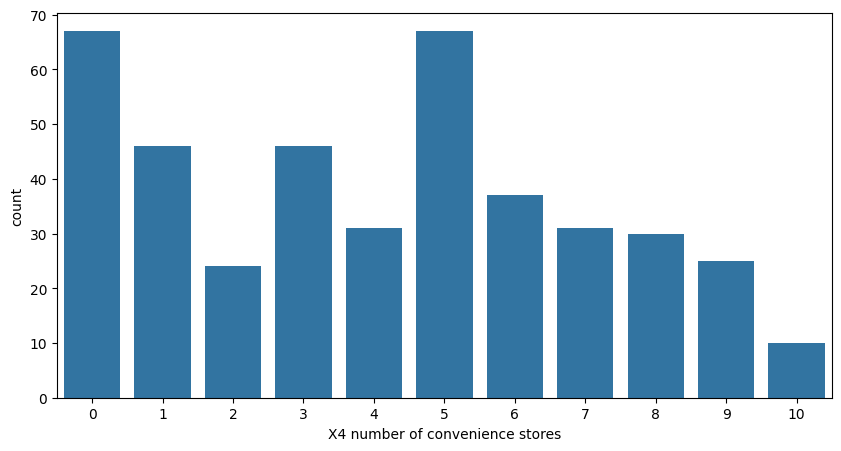

In [123]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='X4 number of convenience stores')

plt.show()

In [124]:
sns.boxplot(data=df)

<Axes: >

In [125]:
df.columns

Index(['X2 house age', 'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   X2 house age                            414 non-null    float64 
 1   X3 distance to the nearest MRT station  414 non-null    float64 
 2   X4 number of convenience stores         414 non-null    category
 3   X5 latitude                             414 non-null    float64 
 4   X6 longitude                            414 non-null    float64 
 5   Y house price of unit area              414 non-null    float64 
dtypes: category(1), float64(5)
memory usage: 17.1 KB


In [127]:
def transform_dataframe(df):
  required_columns = ['X3 distance to the nearest MRT station', 'X5 latitude', 'X6 longitude']
  # –°–æ–∑–¥–∞–Ω–∏–µ –∫–æ–ø–∏–∏ DataFrame, —á—Ç–æ–±—ã –Ω–µ –∏–∑–º–µ–Ω—è—Ç—å –∏—Å—Ö–æ–¥–Ω—ã–π df
  df_transformed = df.copy()

  # –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –ø–µ—Ä–≤—ã—Ö —á–µ—Ç—ã—Ä–µ—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å –ø–æ–º–æ—â—å—é StandardScaler
  scaler = StandardScaler()
  scaled_features = scaler.fit_transform(df_transformed[required_columns[:]])

  # –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ 'ph_bins' —Å –ø–æ–º–æ—â—å—é pd.get_dummies
  age_bins_dummies = pd.get_dummies(df_transformed['X2 house age'], prefix='age')
  number_of_convenience_stores_bins_dummies = pd.get_dummies(df_transformed['X4 number of convenience stores'], prefix='number of convenience stores')
  # –û–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ dummy –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö
  df_transformed = pd.DataFrame(scaled_features, columns=required_columns[:])
  df_transformed = pd.concat([df_transformed, age_bins_dummies], axis=1)
  df_transformed = pd.concat([df_transformed, number_of_convenience_stores_bins_dummies], axis=1)
  return df_transformed

df_research = transform_dataframe(df[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']])
df_research = pd.concat([df_research, df['Y house price of unit area'], ], axis=1)

In [128]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['X2 house age', 'X3 distance to the nearest MRT station', 'X5 latitude', 'X6 longitude']])
number_of_convenience_stores_bins_dummies = pd.get_dummies(df['X4 number of convenience stores'], prefix='number of convenience stores')
# –û–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ dummy –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö
df_transformed = pd.DataFrame(scaled_features, columns=['X2 house age', 'X3 distance to the nearest MRT station', 'X5 latitude', 'X6 longitude'])
df_transformed = pd.concat([df_transformed, number_of_convenience_stores_bins_dummies], axis=1)

df_y = df['Y house price of unit area'].reset_index()
df_vivod = pd.concat([df_transformed,df_y['Y house price of unit area'] , ], axis=1)
df_vivod

X2 house age  X3 distance to the nearest MRT station  X5 latitude  \
0        1.255628                               -0.792495     1.125430   
1        0.157086                               -0.616612     0.912444   
2       -0.387791                               -0.414015     1.486860   
3       -0.387791                               -0.414015     1.486860   
4       -1.117223                               -0.549997     0.834188   
..            ...                                     ...          ...   
409     -0.352637                                2.378365    -2.216993   
410     -1.064493                               -0.788071     0.427579   
411      0.095568                               -0.549678     0.822893   
412     -0.844784                               -0.776684    -0.184755   
413     -0.985398                               -0.788071     0.427579   

     X6 longitude  number of convenience stores_0  \
0        0.448762                               0   
1        0.401139                               0   
2        0.688183                               0   
3        0.688183                               0   
4        0.592937                               0   
..            ...                             ...   
409     -1.927835                               1   
410      0.635341                               0   
411      0.423972                               0   
412      0.476814                               0   
413      0.635341                               0   

     number of convenience stores_1  number of convenience stores_2  \
0                                 0                               0   
1                                 0                               0   
2                                 0                               0   
3                                 0                               0   
4                                 0                               0   
..                              ...                             ...   
409                               0                               0   
410                               0                               0   
411                               0                               0   
412                               0                               0   
413                               0                               0   

     number of convenience stores_3  number of convenience stores_4  \
0                                 0                               0   
1                                 0                               0   
2                                 0                               0   
3                                 0                               0   
4                                 0                               0   
..                              ...                             ...   
409                               0                               0   
410                               0                               0   
411                               0                               0   
412                               0                               0   
413                               0                               0   

     number of convenience stores_5  number of convenience stores_6  \
0                                 0                               0   
1                                 0                               0   
2                                 1                               0   
3                                 1                               0   
4                                 1                               0   
..                              ...                             ...   
409                               0                               0   
410                               0                               0   
411                               0                               0   
412                               1                            

### –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö

–î–ª—è –Ω–∞—á–∞–ª–∞, —Ä–∞–∑–¥–µ–ª–∏—Ç—å –¥–∞–Ω–Ω—ã–µ –Ω–∞ X –∏ Y

–†–∞–∑–±–∏—Ç—å –¥–∞–Ω–Ω—ã–µ –Ω–∞ —Ç–µ—Å—Ç–æ–≤—É—é –∏ –æ–±—É—á–∞—é—â—É—é –≤—ã–±–æ—Ä–∫–∏

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫–∏
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df.describe()

X2 house age  X3 distance to the nearest MRT station  X5 latitude  \
count    414.000000                              414.000000   414.000000   
mean      17.712560                             1083.885689    24.969030   
std       11.392485                             1262.109595     0.012410   
min        0.000000                               23.382840    24.932070   
25%        9.025000                              289.324800    24.963000   
50%       16.100000                              492.231300    24.971100   
75%       28.150000                             1454.279000    24.977455   
max       43.800000                             6488.021000    25.014590   

       X6 longitude  Y house price of unit area  
count    414.000000                  414.000000  
mean     121.533361                   37.980193  
std        0.015347                   13.606488  
min      121.473530                    7.600000  
25%      121.528085                   27.700000  
50%      121.538630                   38.450000  
75%      121.543305                   46.600000  
max      121.566270                  117.500000

In [130]:
df

X2 house age  X3 distance to the nearest MRT station  \
0            32.0                                84.87882   
1            19.5                               306.59470   
2            13.3                               561.98450   
3            13.3                               561.98450   
4             5.0                               390.56840   
..            ...                                     ...   
409          13.7                              4082.01500   
410           5.6                                90.45606   
411          18.8                               390.96960   
412           8.1                               104.81010   
413           6.5                                90.45606   

    X4 number of convenience stores  X5 latitude  X6 longitude  \
0                                10     24.98298     121.54024   
1                                 9     24.98034     121.53951   
2                                 5     24.98746     121.54391   
3                                 5     24.98746     121.54391   
4                                 5     24.97937     121.54245   
..                              ...          ...           ...   
409                               0     24.94155     121.50381   
410                               9     24.97433     121.54310   
411                               7     24.97923     121.53986   
412                               5     24.96674     121.54067   
413                               9     24.97433     121.54310   

     Y house price of unit area  
0                          37.9  
1                          42.2  
2                          47.3  
3                          54.8  
4                          43.1  
..                          ...  
409                        15.4  
410                        50.0  
411                        40.6  
412                        52.5  
413                        63.9  

[414 rows x 6 columns]

In [131]:
df_research.describe()

X3 distance to the nearest MRT station   X5 latitude  X6 longitude  \
count                            4.140000e+02  4.140000e+02  4.140000e+02   
mean                            -1.265762e-16  1.343166e-13 -1.614537e-12   
std                              1.001210e+00  1.001210e+00  1.001210e+00   
min                             -8.412787e-01 -2.981805e+00 -3.903223e+00   
25%                             -6.303115e-01 -4.864845e-01 -3.441981e-01   
50%                             -4.693493e-01  1.669943e-01  3.437301e-01   
75%                              2.938267e-01  6.796928e-01  6.487148e-01   
max                              4.287008e+00  3.675611e+00  2.146891e+00   

          age_0.0     age_1.0     age_1.1     age_1.5     age_1.7     age_1.8  \
count  414.000000  414.000000  414.000000  414.000000  414.000000  414.000000   
mean     0.041063    0.002415    0.012077    0.004831    0.002415    0.002415   
std      0.198676    0.049147    0.109363    0.069421    0.049147    0.049147   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

          age_1.9  ...  number of convenience stores_2  \
count  414.000000  ...                      414.000000   
mean     0.002415  ...                        0.057971   
std      0.049147  ...                        0.233971   
min      0.000000  ...                        0.000000   
25%      0.000000  ...                        0.000000   
50%      0.000000  ...                        0.000000   
75%      0.000000  ...                        0.000000   
max      1.000000  ...                        1.000000   

       number of convenience stores_3  number of convenience stores_4  \
count                      414.000000                      414.000000   
mean                         0.111111                        0.074879   
std                          0.314650                        0.263515   
min                          0.000000                        0.000000   
25%                          0.000000                        0.000000   
50%                          0.000000                        0.000000   
75%                          0.000000                        0.000000   
max                          1.000000                        1.000000   

       number of convenience stores_5  number of convenience stores_6  \
count                      414.000000                      414.000000   
mean                         0.161836                        0.089372   
std                          0.368746                        0.285625   
min                          0.000000                        0.000000   
25%                          0.000000                        0.000000   
50%                          0.000000                        0.000000   
75%                          0.000000                        0.000000   
max                          1.000000                        1.000000   

       number of convenience stores_7  number of convenience stores_8  \
count                      414.000000                      414.000000   
mean                         0.074879                        0.072464   
std                          0.263515                        0.259568   
min                          0.000000                        0.000000   
25%                          0.000000                        0.000000   
50%                          0.000000                        0.000000   
75%                          0.000000                        0.000000   
max                          1.000000                        1.000000   

       number of convenience stores_9  number of convenience stores_10  \
count       

In [132]:
df_research

X3 distance to the nearest MRT station  X5 latitude  X6 longitude  \
0                                 -0.792495     1.125430      0.448762   
1                                 -0.616612     0.912444      0.401139   
2                                 -0.414015     1.486860      0.688183   
3                                 -0.414015     1.486860      0.688183   
4                                 -0.549997     0.834188      0.592937   
..                                      ...          ...           ...   
409                                2.378365    -2.216993     -1.927835   
410                               -0.788071     0.427579      0.635341   
411                               -0.549678     0.822893      0.423972   
412                               -0.776684    -0.184755      0.476814   
413                               -0.788071     0.427579      0.635341   

     age_0.0  age_1.0  age_1.1  age_1.5  age_1.7  age_1.8  age_1.9  ...  \
0          0        0        0        0        0        0        0  ...   
1          0        0        0        0        0        0        0  ...   
2          0        0        0        0        0        0        0  ...   
3          0        0        0        0        0        0        0  ...   
4          0        0        0        0        0        0        0  ...   
..       ...      ...      ...      ...      ...      ...      ...  ...   
409        0        0        0        0        0        0        0  ...   
410        0        0        0        0        0        0        0  ...   
411        0        0        0        0        0        0        0  ...   
412        0        0        0        0        0        0        0  ...   
413        0        0        0        0        0        0        0  ...   

     number of convenience stores_2  number of convenience stores_3  \
0                                 0                               0   
1                                 0                               0   
2                                 0                               0   
3                                 0                               0   
4                                 0                               0   
..                              ...                             ...   
409                               0                               0   
410                               0                               0   
411                               0                               0   
412                               0                               0   
413                               0                               0   

     number of convenience stores_4  number of convenience stores_5  \
0                                 0                               0   
1                                 0                               0   
2                                 0                               1   
3                                 0                               1   
4                                 0                               1   
..                              ...                             ...   
409                               0                               0   
410                               0                               0   
411                               0                               0   
412                               0                               1   
413                               0                               0   

     number of convenience stores_6  number of convenience stores_7  \
0                                 0                               0   
1                                 0                               0   
2                                 0                               0   
3                                 0                               0   
4                                 0                               0   
..                              ...                             ...   
409         

In [133]:
y = df_vivod['Y house price of unit area']
X = df_vivod.drop('Y house price of unit area', axis=1)
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

### –û–±—É—á–µ–Ω–∏–µ
#### 1 –†–µ–≥—Ä–µ—Å—Å–∏—è
- –û–±—É—á–∏—Ç—å –ª–∏–Ω–µ–π–Ω—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏—é –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)
- –°–¥–ª–µ–∞—Ç—å .predict() –¥–ª—è X_train, X_test
- –†–∞—Å—Å—á–∏—Ç–∞—Ç—å –º–µ—Ç—Ä–∏–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ MAE, MSE, MAPE, R2
- –í—ã–≤–µ—Å—Ç–∏ –∏ –Ω–∞–ø–∏—Å–∞—Ç—å –≤—ã–≤–æ–¥—ã –æ –∫–æ—ç—Ñ–∏—Ü–∏–µ–Ω—Ç–∞—Ö —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
- –ù–∞–ø–∏—Å–∞—Ç—å —Ñ–æ—Ä–º—É–ª—É —Ä–µ–≥—Ä–µ—Å—Å–∏–∏

–°–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥—ã –æ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–∏ –º–æ–¥–µ–ª–∏ (—Å–º –º–µ—Ç—Ä–∏–∫–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ) —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥—ã –æ –º–µ—Ç—Ä–∏–∫–∞—Ö –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ

#### 2 –ë–ª–∏–∂–∞–π—à–∏–µ —Å–æ—Å–µ–¥–∏
- –û–±—É—á–∏—Ç—å KNN (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor)
- –°–¥–ª–µ–∞—Ç—å .predict() –¥–ª—è X_train, X_test
- –†–∞—Å—Å—á–∏—Ç–∞—Ç—å –º–µ—Ç—Ä–∏–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ MAE, MSE, MAPE, R2

–°–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥—ã –æ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–∏ –º–æ–¥–µ–ª–∏ (—Å–º –º–µ—Ç—Ä–∏–∫–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ) —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥—ã –æ –º–µ—Ç—Ä–∏–∫–∞—Ö –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –Ω–∞–±–æ—Ä–µ

In [134]:
def compute_regression(X, y):
  # –°–æ–∑–¥–∞–Ω–∏–µ –∏ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
  model = LinearRegression()
  model.fit(X, y)

  return model


def compute_metrics(y, predicted):
  # –û—Ü–µ–Ω–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏
  mae = mean_absolute_error(y, predicted)
  mse = mean_squared_error(y, predicted)
  r2 = r2_score(y, predicted)
  mape = mean_absolute_percentage_error(y, predicted)

  return {
      'MAE': mae,
      'MSE': mse,
      'R2': r2,
      'mape (reverted - % –≤–µ—Ä–Ω–æ —É–≥–∞–¥–∞–Ω—ã—Ö)': (1 - mape) * 100,
      'mape (original - % –æ—à–∏–±–æ–∫)': mape * 100,
  }

In [135]:
model = compute_regression(X_train, y_train) # –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–µ –Ω–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ (–ø—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ)
y_pred = model.predict(X_train)

compute_metrics(y_train, y_pred)

{'MAE': 6.339704852416496,
 'MSE': 83.11097569289842,
 'R2': 0.5581330550666481,
 'mape (reverted - % –≤–µ—Ä–Ω–æ —É–≥–∞–¥–∞–Ω—ã—Ö)': 80.92807192393026,
 'mape (original - % –æ—à–∏–±–æ–∫)': 19.071928076069742}

In [136]:
model = compute_regression(X_train, y_train) # –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–µ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ
y_pred = model.predict(X_test)

compute_metrics(y_test, y_pred)

{'MAE': 5.305232952584752,
 'MSE': 53.502252361179515,
 'R2': 0.6810781244679265,
 'mape (reverted - % –≤–µ—Ä–Ω–æ —É–≥–∞–¥–∞–Ω—ã—Ö)': 82.81795774082241,
 'mape (original - % –æ—à–∏–±–æ–∫)': 17.182042259177592}

In [137]:
df_vivod

X2 house age  X3 distance to the nearest MRT station  X5 latitude  \
0        1.255628                               -0.792495     1.125430   
1        0.157086                               -0.616612     0.912444   
2       -0.387791                               -0.414015     1.486860   
3       -0.387791                               -0.414015     1.486860   
4       -1.117223                               -0.549997     0.834188   
..            ...                                     ...          ...   
409     -0.352637                                2.378365    -2.216993   
410     -1.064493                               -0.788071     0.427579   
411      0.095568                               -0.549678     0.822893   
412     -0.844784                               -0.776684    -0.184755   
413     -0.985398                               -0.788071     0.427579   

     X6 longitude  number of convenience stores_0  \
0        0.448762                               0   
1        0.401139                               0   
2        0.688183                               0   
3        0.688183                               0   
4        0.592937                               0   
..            ...                             ...   
409     -1.927835                               1   
410      0.635341                               0   
411      0.423972                               0   
412      0.476814                               0   
413      0.635341                               0   

     number of convenience stores_1  number of convenience stores_2  \
0                                 0                               0   
1                                 0                               0   
2                                 0                               0   
3                                 0                               0   
4                                 0                               0   
..                              ...                             ...   
409                               0                               0   
410                               0                               0   
411                               0                               0   
412                               0                               0   
413                               0                               0   

     number of convenience stores_3  number of convenience stores_4  \
0                                 0                               0   
1                                 0                               0   
2                                 0                               0   
3                                 0                               0   
4                                 0                               0   
..                              ...                             ...   
409                               0                               0   
410                               0                               0   
411                               0                               0   
412                               0                               0   
413                               0                               0   

     number of convenience stores_5  number of convenience stores_6  \
0                                 0                               0   
1                                 0                               0   
2                                 1                               0   
3                                 1                               0   
4                                 1                               0   
..                              ...                             ...   
409                               0                               0   
410                               0                               0   
411                               0                               0   
412                               1                            

##–ó–∞–¥–∞–Ω–∏–µ –¥–ª—è –≥–µ–Ω–∏–µ–≤*

–£–¥–∞—á–∏ üòà

–í –ø—Ä–∞–∫—Ç–∏–∫–µ –µ—Å—Ç—å –ø—Ä–∏–º–µ—Ä—ã —Ä–µ–∞–ª–∏–∑–∞—Ü–∏–∏ ```linear_regression``` –∏ ```knn_regressor```, –Ω–æ –µ—Å—Ç—å –Ω—é–∞–Ω—Å... –°–µ–π—á–∞—Å –Ω–∏ linear_regression, –Ω–∏ knn_regressor –Ω–µ –ø–æ–¥–¥–µ—Ä–∂–∏–≤–∞—é—Ç —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è —Å–æ—Å—Ç–æ—è–Ω–∏—è –¥–ª—è –ø–æ—Å–ª–µ–¥—É—é—â–µ–≥–æ –≤–æ–∑–º–æ–∂–Ω–æ–≥–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è.

–ù–µ–æ–±—Ö–æ–¥–∏–º–æ - —Ä–µ–∞–ª–∏–∑–æ–≤–∞—Ç—å –¥–≤–∞ –∫–ª–∞—Å—Å–∞ LinearRegression –∏ KNNRegression (–ø—Ä–∏–º–µ—Ä—ã –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–µ–∫ –µ—Å—Ç—å). –í —ç—Ç–∏—Ö –∫–ª–∞—Å—Å–∞—Ö –æ–±—è–∑–∞—Ç–ª—å–Ω–æ –¥–æ–ª–∂–Ω—ã –±—ã—Ç—å –¥–≤–∞ –º–µ—Ç–æ–¥–∞
```
.fit(X: np.array, y: np.array) -> None - –æ–±—É—á–∏—Ç—å –º–æ–¥–µ–ª—å –∏ —Å–æ—Ö—Ä–∞–Ω–∏—Ç—å –≤–Ω—É—Ç—Ä–µ–Ω–Ω–µ–µ —Å–æ—Å—Ç–æ—è–Ω–∏–µ –º–æ–¥–µ–ª–∏
.predict(X) -> np.array - –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç—å y –Ω–∞ –æ—Å–Ω–æ–≤–µ X
```
–ü—Ä–∏ –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–∏ –∫–ª–∞—Å—Å–∞ - –ø–µ—Ä–µ–¥–∞–≤–∞—Ç—å –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –º–æ–¥–µ–ª–∏ –≤ –º–æ–º–µ–Ω—Ç –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–∏. –ù–∞–ø—Ä–∏–º–µ—Ä:

```
model = LinearRegression(**params)

model.fit(X_train, y_train)
model.predict(X_test)
```

–í –∫–∞—á–µ—Å—Ç–≤–µ —Ç–µ—Å—Ç–æ–≤ –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å KNN –∏ LinearRegression –∏–∑ sklearn, —Ä–µ–∑—É–ª—å—Ç–∞—Ç —Ä–∞–±–æ—Ç—ã –≤–∞—à–∏—Ö –æ–±—ä–µ–∫—Ç–æ–≤ –¥–æ–ª–∂–µ–Ω –ø—Ä–∏–º–µ—Ä–Ω–æ —Å–æ–≤–ø–∞–¥–∞—Ç—å —Å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º–∏ —Ä–∞–±–æ—Ç—ã –æ–±—ä–µ–∫—Ç–æ–≤ –∏–∑ sklearn

–í —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ —Ä–∞–±–æ—Ç—ã —Å–¥–µ–ª–∞—Ç—å —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ —Å —Ç–µ–º–∏ –∂–µ –¥–∞–Ω–Ω—ã–º–∏ –≤ sklearn

In [ ]:
"""
–†–µ–∑—É–ª—å—Ç–∞—Ç —Ä–∞–±–æ—Ç—ã
"""